In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
%matplotlib inline

In [15]:
df = pd.read_csv('attributes.csv', delimiter=';')
df[['PURCHASE_DAYS',
       'PURCHASE_DAYS_PROMO', 'PURCHASE_SUMMA', 'TOTAL_DISCOUNT',
       'PROMO_DISCOUNT', 'PURCHASE_UNITS', 'PURCHASE_UNITS_FULLPRICE',
       'PURCHASE_UNITS_30_DISCOUNT', 'PURCHASE_UNITS_50_DISCOUNT',
       'PURCHASE_UNITS_APPARELL', 'PURCHASE_UNITS_FOOTWEAR',
       'PURCHASE_UNITS_EQUIPMENT', 'PURCHASE_UNITS_KIDS', 'PURCHASE_UNITS_MEN',
       'PURCHASE_UNITS_WOMEN', 'BONUS_SUMMA_GIFT', 'BONUS_SUMMA_FOR_PURCHASE',
       'BONUS_SPENT_GIFT', 'BONUS_SPENT_FOR_PURCHASE']].head(5)

,PURCHASE_DAYS,PURCHASE_DAYS_PROMO,PURCHASE_SUMMA,TOTAL_DISCOUNT,PROMO_DISCOUNT,PURCHASE_UNITS,PURCHASE_UNITS_FULLPRICE,PURCHASE_UNITS_30_DISCOUNT,PURCHASE_UNITS_50_DISCOUNT,PURCHASE_UNITS_APPARELL,PURCHASE_UNITS_FOOTWEAR,PURCHASE_UNITS_EQUIPMENT,PURCHASE_UNITS_KIDS,PURCHASE_UNITS_MEN,PURCHASE_UNITS_WOMEN,BONUS_SUMMA_GIFT,BONUS_SUMMA_FOR_PURCHASE,BONUS_SPENT_GIFT,BONUS_SPENT_FOR_PURCHASE
0,5,1,27173.0,0.170872,0.045769,9,5,2,0,4,1,1,0,4,0,6600.0,6516,1000,500
1,2,0,2268.0,0.183291,0.183291,3,2,0,0,3,0,0,0,2,0,4491.0,3100,0,509
2,3,0,8295.0,0.247892,0.006710,9,6,0,1,5,0,3,0,0,3,2350.0,2100,0,74
3,2,0,1621.0,0.006131,0.006131,5,4,0,0,4,0,1,0,2,0,1000.0,0,10,0
4,8,1,17620.0,0.387058,0.113440,22,4,2,3,14,2,4,2,6,4,2600.0,1000,1961,0


Проанализируем какая часть покупателей сколько прибыли генерирует

In [3]:
full_profit = df['PURCHASE_SUMMA'].sum()
print(full_profit)
pdf = df[df['PURCHASE_SUMMA'] > 0][['PURCHASE_DAYS', 'PURCHASE_SUMMA', 'PURCHASE_UNITS']].sort_values('PURCHASE_SUMMA', ascending=False)
pdf['profit_prc'] = pdf['PURCHASE_SUMMA']/(full_profit/100)
pdf['profit_sum_prc'] = pdf['profit_prc'].cumsum()
bins = np.arange(0,101, 10)
labels = [10,20,30,40,50,60,70,80,90,100]
pdf['percent_group'] = pd.cut(pdf['profit_sum_prc'], bins, labels=labels)
pdf.head(5)

1319024236.949999


,PURCHASE_DAYS,PURCHASE_SUMMA,PURCHASE_UNITS,profit_prc,profit_sum_prc,percent_group
67750,83,481800.5,350,0.036527,0.036527,10
59647,23,439535.0,105,0.033323,0.069850,10
45785,79,428858.0,396,0.032513,0.102363,10
60544,30,390412.0,193,0.029599,0.131962,10
34462,57,389929.0,202,0.029562,0.161524,10


используем столбец profit_prc для подсчета клиентов

In [24]:
grp_df = pdf.groupby('percent_group').agg({'PURCHASE_SUMMA': 'sum', 'PURCHASE_UNITS': 'sum', 'profit_prc': 'count'})

In [25]:
grp_df = grp_df.reset_index()
grp_df.head(5)

,percent_group,PURCHASE_SUMMA,PURCHASE_UNITS,profit_prc
0,10,1.317954e+08,117215,775
1,20,1.319785e+08,128194,1356
2,30,1.318971e+08,130320,1890
3,40,1.319157e+08,133878,2476
4,50,1.318964e+08,141473,3171


In [26]:
grp_df = grp_df.rename(columns={'profit_prc':'client_count'})


In [27]:
grp_df['client_cumsum'] = grp_df['client_count'].cumsum()
grp_df['profit_percent'] = grp_df['percent_group'].astype(int)

Отрисуем график прибыли от кол-ва покупателей

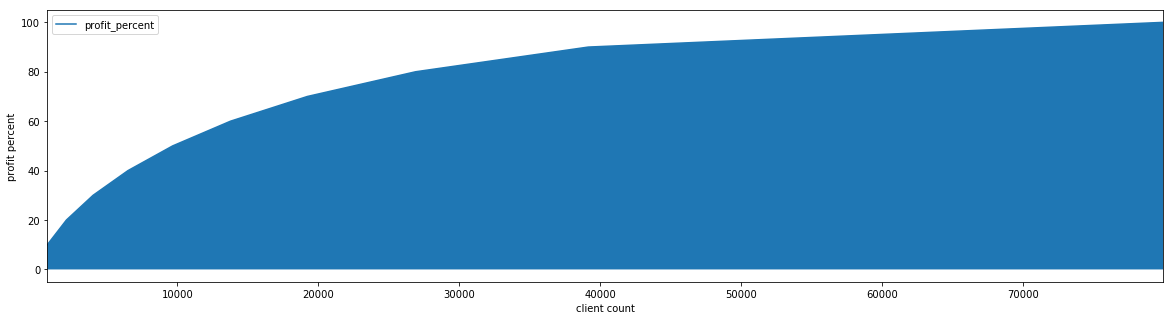

In [28]:
ax = grp_df.plot(y='profit_percent',x='client_cumsum', figsize=(20, 5), )
ax.set_ylabel("profit percent")
ax.set_xlabel("client count")  
ax.fill_between(grp_df['client_cumsum'], 0, grp_df['profit_percent'])

In [46]:
client_1prc=grp_df['client_count'].sum()/100
grp_df['client_count_prc'] = grp_df['client_count']/client_1prc

units_1prc=grp_df['PURCHASE_UNITS'].sum()/100
grp_df['units_count_prc'] = grp_df['PURCHASE_UNITS']/units_1prc

grp_df

,percent_group,PURCHASE_SUMMA,PURCHASE_UNITS,client_count,client_cumsum,profit_percent,client_count_prc,units_count_prc
0,10,1.317954e+08,117215,775,775,10,0.969332,8.027567
1,20,1.319785e+08,128194,1356,2131,20,1.696018,8.779473
2,30,1.318971e+08,130320,1890,4021,30,2.363918,8.925074
3,40,1.319157e+08,133878,2476,6497,40,3.096858,9.168746
4,50,1.318964e+08,141473,3171,9668,50,3.966130,9.688896
5,60,1.319160e+08,141256,4103,13771,60,5.131829,9.674035
6,70,1.319058e+08,144158,5452,19223,70,6.819091,9.872781
7,80,1.319028e+08,153003,7676,26899,80,9.600760,10.478538
8,90,1.319078e+08,159646,12255,39154,90,15.327947,10.933489
9,100,1.319086e+08,211013,40798,79952,100,51.028117,14.451401


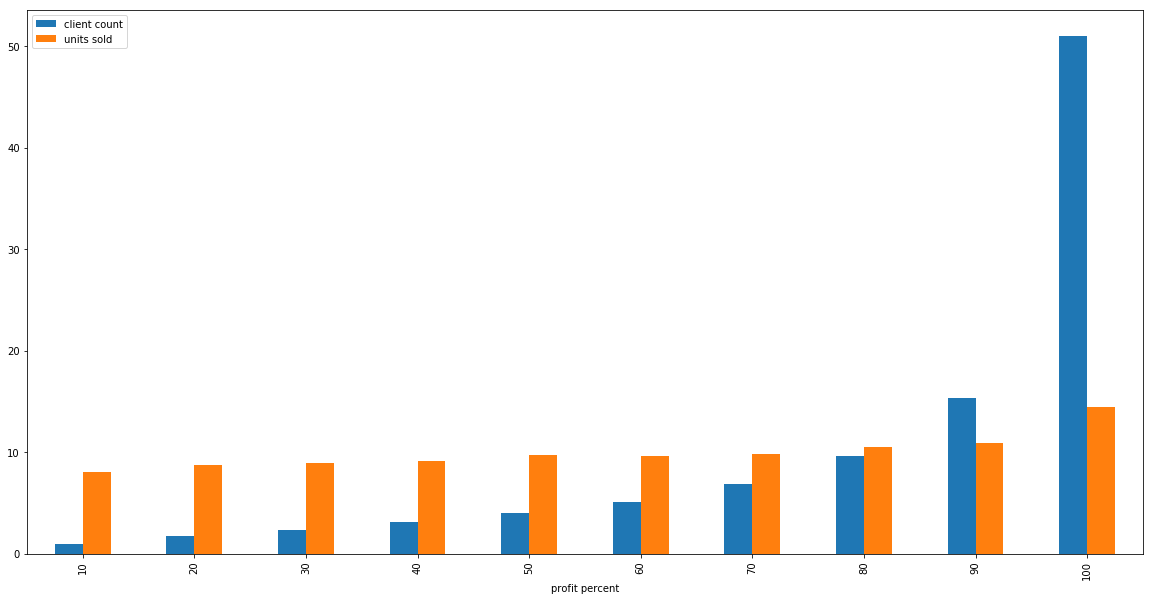

In [48]:
ax = grp_df.plot.bar(x='profit_percent', y=['client_count_prc', 'units_count_prc'], figsize=(20,10))
ax.legend(["client count", "units sold"])
ax.set_xlabel("profit percent")  

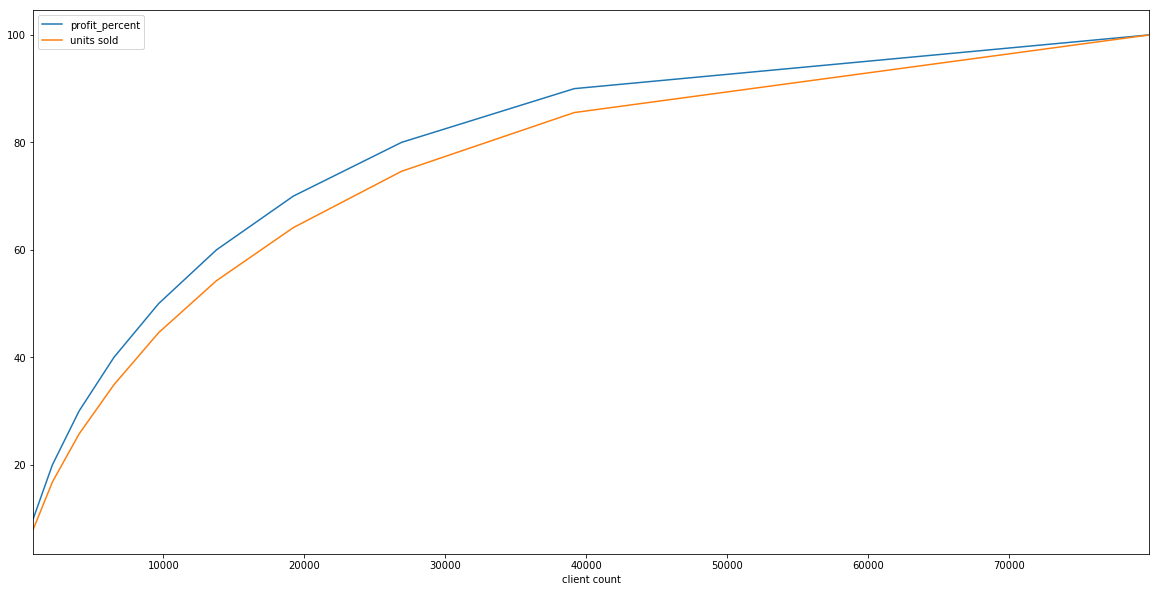

In [52]:
grp_df['unit_prc_cumsum'] = grp_df['units_count_prc'].cumsum()
ax = grp_df.plot(x='client_cumsum', y=['profit_percent', 'unit_prc_cumsum'], figsize=(20,10))
ax.legend(["profit_percent", "units sold"])
ax.set_xlabel("client count")  

In [133]:
def trunc_sum(df, ind, col):
    return df[col].loc[ind] //1000*1000

df_p =  df[['PURCHASE_DAYS', 'PURCHASE_SUMMA',
            'BONUS_SUMMA_GIFT', 'BONUS_SUMMA_FOR_PURCHASE',
            'BONUS_SPENT_GIFT', 'BONUS_SPENT_FOR_PURCHASE']]
df_p = df_p.groupby(lambda x: trunc_sum(df_p, x, 'PURCHASE_SUMMA')).agg('sum')
df_p = df_p.reset_index()
df_p = df_p.rename(index=str,columns ={'index': 'AVG_PURCHASE_SUM'})
df_p

,AVG_PURCHASE_SUM,PURCHASE_DAYS,PURCHASE_SUMMA,BONUS_SUMMA_GIFT,BONUS_SUMMA_FOR_PURCHASE,BONUS_SPENT_GIFT,BONUS_SPENT_FOR_PURCHASE
0,0.0,8820,4117565.00,13707814.00,724866,140061,305959
1,1000.0,12028,11381689.00,17505210.00,5468133,482800,208570
2,2000.0,12230,15139887.23,16057060.00,5569658,657898,212301
3,3000.0,12662,17992594.69,14921896.00,5405993,825534,244618
4,4000.0,12463,19557149.07,13780933.00,5582812,813245,266059
5,5000.0,12405,20741067.27,12630423.00,5423223,771348,351017
6,6000.0,11995,21269825.54,11646612.00,5265765,772434,365939
7,7000.0,11956,21636774.06,10811199.00,5193360,717082,444988
8,8000.0,11474,21574983.53,9923887.00,4942102,695438,490142
9,9000.0,10917,21434340.47,9101284.00,4571987,647054,487709


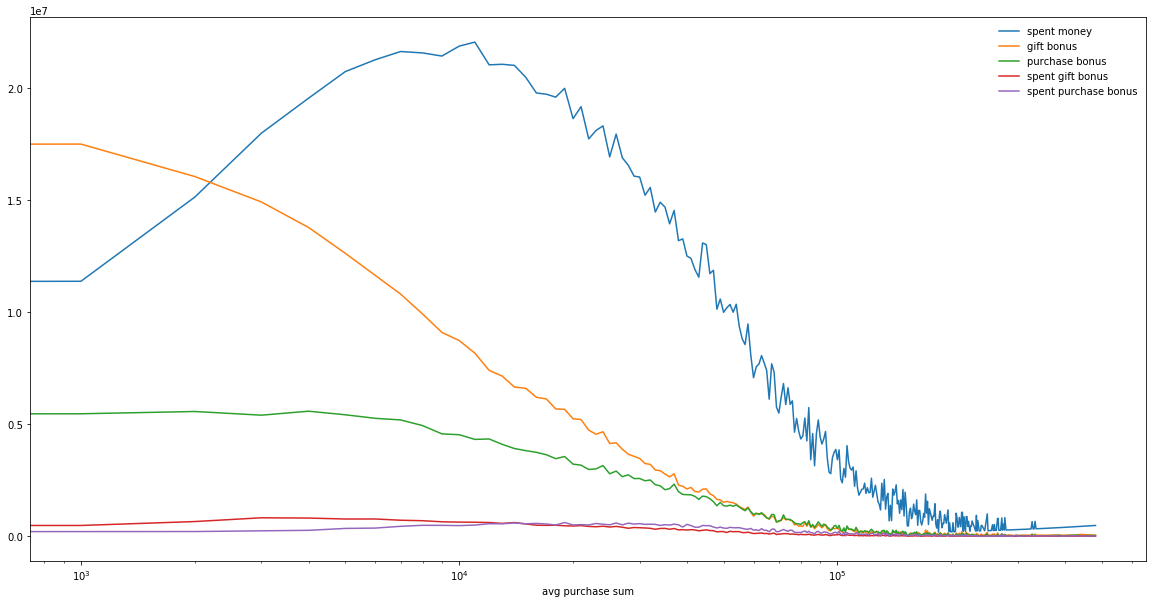

In [149]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
plt.xscale('log')


x = np.array(df_p['AVG_PURCHASE_SUM'])
y = np.array(df_p['PURCHASE_SUMMA'])
y1 = np.array(df_p['BONUS_SUMMA_GIFT'])
y2 = np.array(df_p['BONUS_SUMMA_FOR_PURCHASE'])
y3 = np.array(df_p['BONUS_SPENT_GIFT'])
y4 = np.array(df_p['BONUS_SPENT_FOR_PURCHASE'])

ax.plot(x,y, label='spent money')
ax.plot(x,y1, label='gift bonus')
ax.plot(x,y2, label='purchase bonus')
ax.plot(x,y3, label='spent gift bonus')
ax.plot(x,y4, label='spent purchase bonus')
ax.legend(loc=1, fontsize=10, frameon=False)

#text = np.array(df['state'])
 
#sc = ax.scatter(x, y, s = area, c = colours, cmap = 'inferno', alpha = 0.5, linewidth = 0)

ax.set_xlabel('avg purchase sum', fontsize = 10)


#plt.colorbar(sc)
#for i, state in enumerate(text):
#    ax.annotate(state, (x[i],y[i]), fontsize = 7) 

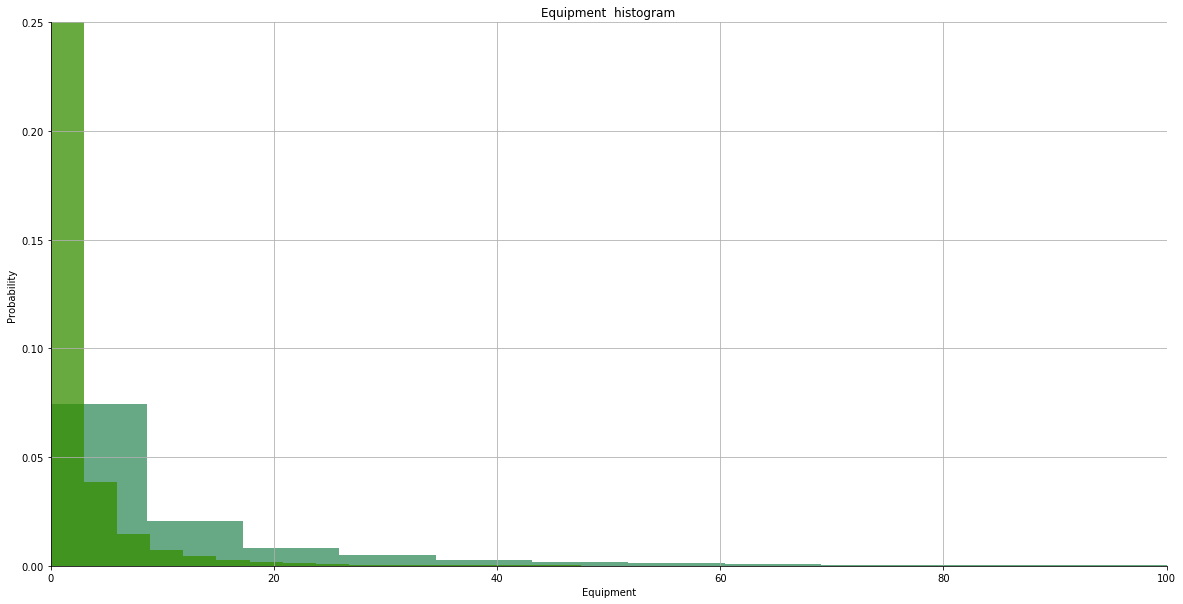

In [160]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

n, bins, patches = plt.hist(df['PURCHASE_UNITS_APPARELL'], 35, normed=1, facecolor='#368d5c', alpha=0.75, stacked=True)
plt.hist(df['PURCHASE_UNITS_KIDS'], 35, normed=1, facecolor='#368d00', alpha=0.75, stacked=True)
plt.xlabel('Equipment', fontsize = 10)
plt.ylabel('Probability', fontsize = 10)
plt.title('Equipment  histogram')
plt.axis([0, 100, 0, 0.25])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()